In [1]:
from stable_baselines3 import PPO
from kaggle_environments import make
import numpy as np
import random
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

/Users/rserra/miniforge3/envs/connect_x/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading environment lux_ai_2022 failed: No module named 'vec_noise'


In [49]:
path = "data"

all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df.head()

,model,version,vs random win,vs random invalid,vs look win,vs look invalid,vs negamax win,vs negamax invalid,saved on
0,model_size64_2048_1_v8,100000,0.64,0,0.00,0,0.01,0,2023-03-29 17:47:42.960441
1,model_size64_2048_1_v8,200000,0.64,0,0.01,0,0.01,0,2023-03-29 18:09:51.736760
2,model_size64_2048_1_v8,300000,0.79,0,0.05,0,0.02,0,2023-03-29 18:30:13.327518
3,model_size64_2048_1_v8,400000,0.73,0,0.10,0,0.01,0,2023-03-29 18:50:20.506274
4,model_size64_2048_1_v8,500000,0.74,0,0.22,0,0.02,0,2023-03-29 19:11:17.966104


In [50]:
# Models 

print(f"There are {len(df.model.unique())} models")


There are 5 models


In [51]:
from scipy.signal import savgol_filter


def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth



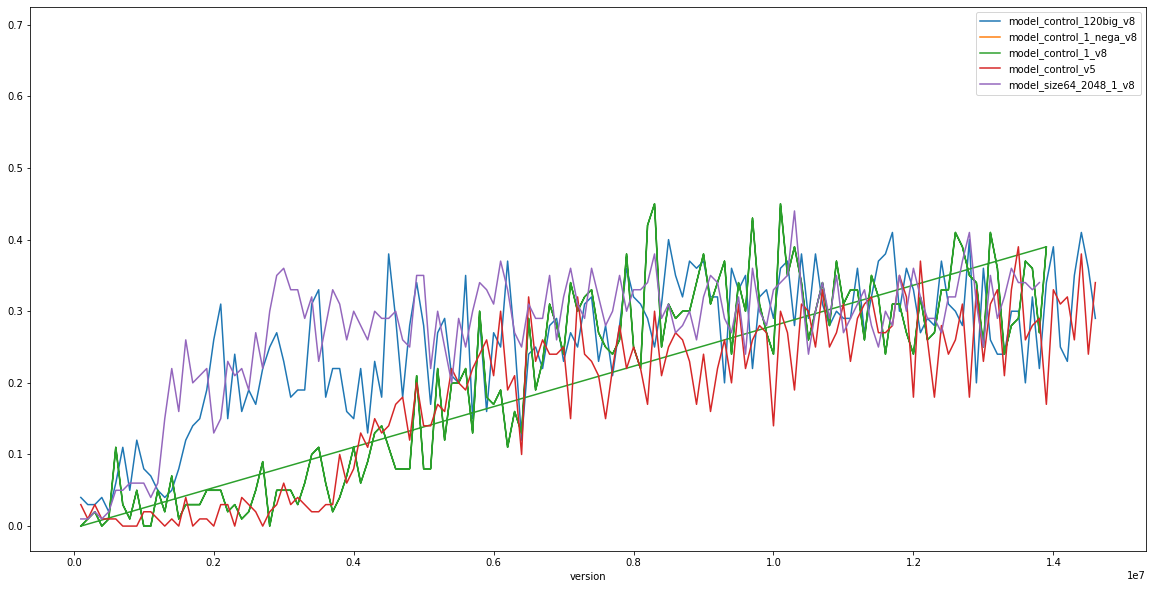

In [52]:
df_vs_negamax = df[['model', 'version', 'vs negamax win']]
df_vs_negamax.set_index('version', inplace=True)
df_vs_negamax.groupby("model")['vs negamax win'].plot(subplots=False, legend=True, figsize=(20, 10))
plt.show()

In [53]:
df_vs_nega = df.groupby(['model']).apply(lambda group: group[group['vs negamax win'] == group['vs negamax win'].max()]).reset_index(drop=True)


df_vs_nega.sort_values(by=['vs negamax win'], inplace=True, ascending=False)
df_vs_nega

,model,version,vs random win,vs random invalid,vs look win,vs look invalid,vs negamax win,vs negamax invalid,saved on
2,model_control_1_nega_v8,8400000,0.86,0,0.25,0,0.69,0,2023-04-02 11:03:35.359299
3,model_control_1_v8,8300000,0.96,0,0.81,0,0.45,0,2023-03-30 17:32:35.852926
4,model_control_1_v8,10100000,0.87,0,0.79,0,0.45,0,2023-03-30 22:39:32.533371
5,model_control_1_v8,8300000,0.96,0,0.81,0,0.45,0,2023-03-30 17:32:35.852926
6,model_control_1_v8,10100000,0.87,0,0.79,0,0.45,0,2023-03-30 22:39:32.533371
8,model_size64_2048_1_v8,10300000,0.87,0,0.85,0,0.44,0,2023-03-30 23:22:27.147843
0,model_control_120big_v8,11700000,0.90,0,0.88,0,0.41,0,2023-04-02 00:13:58.480234
1,model_control_120big_v8,14400000,0.92,0,0.82,0,0.41,0,2023-04-02 08:00:06.379152
7,model_control_v5,13500000,0.86,0,0.84,0,0.39,0,2023-04-02 05:13:42.420409
